In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
pd.options.mode.chained_assignment = None

stock_data = pd.read_csv('dfnew_clean.csv')
model = load_model('LSTM_eps50_bsize64.h5')

In [2]:
target = ['Close']
features = ['Transaction', 'High', 'Low','ForeignNet','TrustNet','DealerNet','Change']
df = stock_data[features + target]
split = int(df.shape[0] * 0.8)
df_test = df.iloc[split:, :].copy()

In [3]:
target_scaler = MinMaxScaler().fit(df_test[target])
df_test[target] = target_scaler.transform(df_test[target])

features_scaler = MinMaxScaler().fit(df_test[features])
df_test[features] = features_scaler.transform(df_test[features])

In [4]:
# extract the input sequences and output values
sequence_length = 10

X_test, y_test = [], []

for i in range(sequence_length, df_test.shape[0]):
    X_test.append(df_test[features + target].iloc[i - sequence_length: i])
    y_test.append(df_test[target].iloc[i])

X_test, y_test = np.array(X_test), np.array(y_test)

print(X_test.shape)

(481, 10, 8)


In [5]:
y_pred = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred)
df['Predicted Close'] = np.nan
df['Predicted Close'].iloc[- y_pred.shape[0]:] = y_pred.flatten()
res=pd.concat([stock_data['DateTime'],df],axis=1)
dfpred=res[['DateTime','Close', 'Predicted Close']].dropna()
dfpred

16/16 [==============================] - 0s 3ms/step


,DateTime,Close,Predicted Close
1971,2021-01-15,601.0,567.023376
1972,2021-01-18,607.0,574.580505
1973,2021-01-19,627.0,580.883057
1974,2021-01-20,647.0,589.723633
1975,2021-01-21,673.0,599.996643
...,...,...,...
2447,2022-12-26,456.5,466.862366
2448,2022-12-27,457.0,464.299194
2449,2022-12-28,451.0,461.778259
2450,2022-12-29,446.0,459.258911


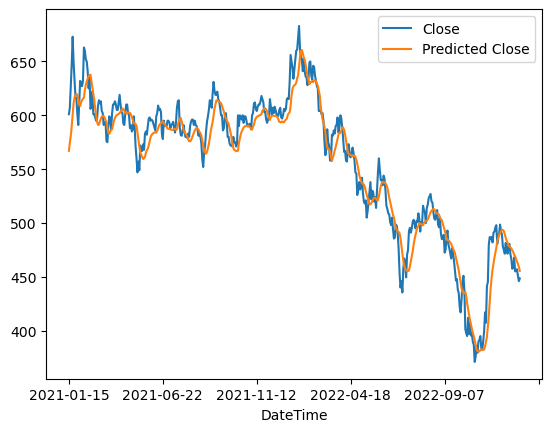

In [6]:
plot=dfpred.plot(x='DateTime')
fig = plot.get_figure()